# 3.6.2 Airline arrivals

Data from [here](http://stat-computing.org/dataexpo/2009/the-data.html)

Task: Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.

15	ArrDelay	arrival delay, in minutes

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df2007 = pd.read_csv("/Users/gemma/Documents/data science/DS Bootcamp/airline-arrivals/2007.csv")


In [3]:
df2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


In [4]:
#df2008 = pd.read_csv("/Users/gemma/Documents/data science/DS Bootcamp/airline-arrivals/2008.csv")


In [5]:
df2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [6]:
print(len(df2007))

7453215


In [7]:
labels = df2007.columns.values

labels

array(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'], dtype=object)

In [8]:
df2007['late'] = np.where(df2007['ArrTime'] > 30, 1,0)

In [9]:
df2007.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,late
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,11,0,NaN,0,0,0,0,0,0,1
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,6,0,NaN,0,0,0,0,0,0,1


In [10]:
df2007.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
late                   int64
dtype: object

In [11]:
df2007.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
late                       0
dtype: int64

In [12]:
havenull= []
for name in labels:
    x = df2007[name].isnull().sum().sum()
    print(name, df2007[name].nunique(), x)
    if x > 0:
        havenull.append(name)
        
print(havenull)

Year 1 0
Month 12 0
DayofMonth 31 0
DayOfWeek 7 0
DepTime 1439 160748
CRSDepTime 1188 0
ArrTime 1440 177927
CRSArrTime 1398 0
UniqueCarrier 20 0
FlightNum 7596 0
TailNum 5505 22
ActualElapsedTime 692 177927
CRSElapsedTime 561 994
AirTime 667 177927
ArrDelay 1232 177927
DepDelay 1226 160748
Origin 304 0
Dest 310 0
Distance 1438 0
TaxiIn 202 0
TaxiOut 334 0
Cancelled 2 0
CancellationCode 4 7292466
Diverted 2 0
CarrierDelay 1045 0
WeatherDelay 623 0
NASDelay 570 0
SecurityDelay 179 0
LateAircraftDelay 585 0
['DepTime', 'ArrTime', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'CancellationCode']


In [13]:
df2007.fillna(value=0, method=None, axis=None, inplace=True, limit=None)

In [14]:
df2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,late
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,11,0,0,0,0,0,0,0,0,1
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,6,0,0,0,0,0,0,0,0,1
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,9,0,0,0,3,0,0,0,31,1
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,8,0,0,0,23,0,0,0,3,1
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,9,0,0,0,0,0,0,0,0,1


In [15]:
df2007.isnull().values.any()

False

## OLS 

In [16]:
#df2007.dropna(how='any',inplace=True)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df2007['ArrTime'].values.reshape(-1, 1)
X = df2007[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'CRSArrTime', 
       'FlightNum',  'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)



Coefficients: 
 [[ 0.00000000e+00 -1.94755133e-01 -5.22799792e-02 -1.53627700e-02
   4.33890702e-01 -3.63361386e-01  8.38870835e-01  9.07647586e-04
   9.38999101e-01 -4.14491273e-02 -6.61256623e-01  1.23751519e+00
  -7.44906051e-01 -3.27740437e-02  3.97186310e-01 -1.26251086e+00
  -9.16250637e+02 -1.47850065e+03 -1.09392262e+00 -1.51215983e+00
  -6.62634050e-01 -2.01676934e+00 -2.28870615e+00]]

Intercept: 
 [143.54153671]

R-squared:
0.7862887707312193


In [17]:
target2 = Y
data2 = X

X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size=0.2, random_state=20)

print('\nWith 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(data2, target2).score(data2, target2)))



With 20% Holdout: 0.7853784456160221
Testing on Sample: 0.7862887707312193


In [18]:
df2007.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,late
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.010943,1.372964e-02,0.005705,-0.003343,0.006600,-0.003047,-0.008841,0.010212,...,0.019242,0.013627,-0.025882,-0.000661,-0.001159,-0.005759,0.000892,-0.000041,-5.253853e-03,0.020367
DayofMonth,NaN,0.010943,1.000000,-5.151867e-03,-0.000927,-0.000911,-0.003391,-0.001180,-0.000822,0.000989,...,0.001587,0.004538,0.000741,0.002810,0.006773,0.004783,0.003899,0.001105,1.267982e-02,-0.002326
DayOfWeek,NaN,0.013730,-0.005152,1.000000e+00,0.008189,0.007085,0.006860,0.006168,-0.002419,0.009702,...,0.011373,-0.016223,-0.006629,-0.001067,0.009629,-0.000369,-0.012127,0.002790,8.382443e-07,0.005170
DepTime,NaN,0.005705,-0.000927,8.189180e-03,1.000000,0.874039,0.743005,0.719300,-0.027993,0.085140,...,0.044260,0.125847,-0.379250,0.003491,0.067430,0.044290,0.085039,0.003437,1.804310e-01,0.239278
CRSDepTime,NaN,-0.003343,-0.000911,7.084563e-03,0.874039,1.000000,0.610295,0.789416,-0.014271,-0.010960,...,-0.038518,0.037019,0.018263,-0.001123,0.022907,0.026451,0.043827,-0.000746,1.473591e-01,-0.084480
ArrTime,NaN,0.006600,-0.003391,6.859610e-03,0.743005,0.610295,1.000000,0.767461,-0.033005,0.136381,...,0.098884,0.126323,-0.390649,-0.126468,0.021236,0.014973,0.076159,-0.000379,6.594586e-02,0.478461
CRSArrTime,NaN,-0.003047,-0.001180,6.167892e-03,0.719300,0.789416,0.767461,1.000000,-0.023542,0.039837,...,-0.002668,0.056557,0.016731,0.006936,0.021457,0.027029,0.060235,0.000001,1.321337e-01,-0.030359
FlightNum,NaN,-0.008841,-0.000822,-2.419239e-03,-0.027993,-0.014271,-0.033005,-0.023542,1.000000,-0.304045,...,-0.007074,0.003633,0.056093,-0.002744,0.038507,0.032329,-0.009903,-0.002026,-3.911914e-03,-0.031466
ActualElapsedTime,NaN,0.010212,0.000989,9.701723e-03,0.085140,-0.010960,0.136381,0.039837,-0.304045,1.000000,...,0.208727,0.308599,-0.251055,-0.081276,0.027007,0.012904,0.160964,0.006218,1.888946e-02,0.205273


In [19]:
coltitles = df2007.columns

for col in coltitles:
    result = df2007[col].map(lambda x: x == 'B')
    print(col, np.sum(result))


Year 0
Month 0
DayofMonth 0
DayOfWeek 0
DepTime 0
CRSDepTime 0
ArrTime 0
CRSArrTime 0
UniqueCarrier 0
FlightNum 0
TailNum 0
ActualElapsedTime 0
CRSElapsedTime 0
AirTime 0
ArrDelay 0
DepDelay 0
Origin 0
Dest 0
Distance 0
TaxiIn 0
TaxiOut 0
Cancelled 0
CancellationCode 61936
Diverted 0
CarrierDelay 0
WeatherDelay 0
NASDelay 0
SecurityDelay 0
LateAircraftDelay 0
late 0


In [20]:
df2007.CancellationCode.unique()

# binarize this 
# you can use getdummies

array([0, 'A', 'B', 'C', 'D'], dtype=object)

In [21]:
# instead of just looking for b im going to look for anything that isnt an integer or a float
myguys = []
for col in coltitles:
    result = df2007[col].map(lambda x: (isinstance(x, int) or isinstance(x, float)) )
    # print(col, np.sum(result))
    if np.sum(result) != len(df2007):
        myguys.append(col)
        
        
print(myguys)

['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']


In [22]:
# going to see how many values each has to see how difficult itll be to binarize

for thatone in myguys:
    print(df2007[thatone].nunique())

20
5506
304
310
5


In [23]:
# just going to use the first 10 origins and destinations to make the dummies from below

origins = list(set(df2007['Origin']))

df2007['Origin'] = df2007['Origin'].map(lambda x: x if x in origins[:10] else "Oth")

In [24]:
df2007['Origin'].nunique()

11

In [25]:
dests = list(set(df2007['Dest']))

df2007['Dest'] = df2007['Dest'].map(lambda x: x if x in dests[:10] else "Oth")

In [26]:
df2007['Dest'].nunique()

11

In [27]:
#len(np.where(df2007.applymap(lambda x: x == 'B')))
# after finding the Bs, replace them
# df.colname.replace()

# binarize cancellation code

#df2007_wcc = pd.concat([df2007.drop('CancellationCode',1), pd.get_dummies(df2007['CancellationCode'])], axis=1)

# and all other objects (anything that had more than 0 in the previous cell checking for 
# not floats or ints )

#firsthalf = [df2007.drop(myguys,1)]

#dfs_to_merge = [df2007['ArrTime']]

dfs_to_merge = [df2007.drop(myguys,1)]

binarize = ['Origin', 'Dest']

for col in binarize:
    dfs_to_merge.append(pd.get_dummies(df2007[col]))
    
df2007_bin = pd.concat(dfs_to_merge, axis=1)    


In [28]:
df2007.drop(myguys,1).head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,late
0,2007,1,1,1,1232.0,1225,1341.0,1340,2891,69.0,...,4,11,0,0,0,0,0,0,0,1
1,2007,1,1,1,1918.0,1905,2043.0,2035,462,85.0,...,5,6,0,0,0,0,0,0,0,1
2,2007,1,1,1,2206.0,2130,2334.0,2300,1229,88.0,...,6,9,0,0,3,0,0,0,31,1
3,2007,1,1,1,1230.0,1200,1356.0,1330,1355,86.0,...,3,8,0,0,23,0,0,0,3,1
4,2007,1,1,1,831.0,830,957.0,1000,2278,86.0,...,3,9,0,0,0,0,0,0,0,1


In [29]:
df2007_bin.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,FAR,FAT,HDN,HNL,HRL,HTS,LAN,Oth,SCE,SEA
0,2007,1,1,1,1232.0,1225,1341.0,1340,2891,69.0,...,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,462,85.0,...,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,1229,88.0,...,0,0,0,0,0,0,0,1,0,0
3,2007,1,1,1,1230.0,1200,1356.0,1330,1355,86.0,...,0,0,0,0,0,0,0,1,0,0
4,2007,1,1,1,831.0,830,957.0,1000,2278,86.0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
#pd.get_dummies(df2007_bin, drop_first=True) 

In [31]:
# dont use this 

#from sklearn import preprocessing

#le = preprocessing.LabelEncoder()

#le.fit(df2007.drop(myguys,1).columns.values)

#le.classes_

#le.transform(df2007['Dest'])

In [32]:
df2007_bin.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,FAR,FAT,HDN,HNL,HRL,HTS,LAN,Oth,SCE,SEA
0,2007,1,1,1,1232.0,1225,1341.0,1340,2891,69.0,...,0,0,0,0,0,0,0,1,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,462,85.0,...,0,0,0,0,0,0,0,1,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,1229,88.0,...,0,0,0,0,0,0,0,1,0,0


#  df2007_bin.info()

In [33]:
# feature engineering and then some more stuff

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create an SelectKBest object to select features with k best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=12)

features = df2007_bin.drop(['FlightNum', 'ArrDelay'], 1)

coltitles = features.columns.values

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(features, df2007_bin['late'])

print('Original number of features:', features.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 0 22] are constant.
  UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Original number of features: 45
Reduced number of features: 12


In [34]:
idxs_selected = fvalue_selector.get_support(indices=True)

print(idxs_selected)


[ 1  4  5  6  7  8 10 13 14 15 16 22]


In [35]:
features_dataframe_new = features.loc[:,coltitles[idxs_selected]]

In [36]:
features_dataframe_new.head()

,Month,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,AirTime,TaxiIn,TaxiOut,Cancelled,Diverted,late
0,1,1232.0,1225,1341.0,1340,69.0,54.0,4,11,0,0,1
1,1,1918.0,1905,2043.0,2035,85.0,74.0,5,6,0,0,1
2,1,2206.0,2130,2334.0,2300,88.0,73.0,6,9,0,0,1
3,1,1230.0,1200,1356.0,1330,86.0,75.0,3,8,0,0,1
4,1,831.0,830,957.0,1000,86.0,74.0,3,9,0,0,1


In [37]:
features_dataframe_new.columns.values

array(['Month', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'ActualElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'Diverted', 'late'], dtype=object)

## OLS with reduced # of features

In [38]:
linear_formula2 = 'ArrDelay ~ DepTime+ActualElapsedTime+AirTime+TaxiIn+Cancelled+Diverted'

# Fit the model to our data using the formula.
lm2 = smf.ols(formula=linear_formula2, data=df2007).fit()

print('Parameters \n\n{}'.format(lm2.params))
print('\n\nP values \n\n{}'.format(lm2.pvalues))
print('\nR Squared\n\n{}'.format(lm2.rsquared))

lm2.conf_int()

Parameters 

Intercept           -32.486007
DepTime               0.014815
ActualElapsedTime     1.056632
AirTime              -1.067310
TaxiIn               -0.131569
Cancelled            32.486007
Diverted             12.521105
dtype: float64


P values 

Intercept            0.0
DepTime              0.0
ActualElapsedTime    0.0
AirTime              0.0
TaxiIn               0.0
Cancelled            0.0
Diverted             0.0
dtype: float64

R Squared

0.1536252257840307


,0,1
Intercept,-32.583319,-32.388695
DepTime,0.014761,0.014869
ActualElapsedTime,1.054390,1.058874
AirTime,-1.069626,-1.064994
TaxiIn,-0.137216,-0.125922
Cancelled,32.285947,32.686067
Diverted,11.982474,13.059737


In [39]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                 2.255e+05
Date:                Tue, 26 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:48:44   Log-Likelihood:            -3.7234e+07
No. Observations:             7453215   AIC:                         7.447e+07
Df Residuals:                 7453208   BIC:                         7.447e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -32.4860      0.050   -654.300      0.000     -32.583     -32.389
DepTime               0.0148   2.77e-05    535.696      0.000       0.015       0.015
ActualElapsedTime     1.0566      0.001    923.684      0.000       1.054       1.059
AirTime              -1.0673      0.001   -903.101      0.000      -1.070      -1.065
TaxiIn               -0.1316      0.003    -45.663      0.000      -0.137      -0.126
Cancelled            32.4860      0.102    318.262      0.000      32.286      32.686
Diverted             12.5211      0.275     45.562      0.000      11.982      13.060
==============================================================================
Omnibus:                  8938560.120   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3003243074.216
Skew:                           6.069   Prob(JB):                         0.00
Kurtosis:                     100.588   Cond. No.                     2.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ridge Regression

In [39]:
data = features_dataframe_new.drop('late',1)
target = features_dataframe_new.late

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)


In [41]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

-0.7515244213922434
0.027481210737734726


In [43]:
print(ridgeregr.score(X_test, y_test))

-0.730967997801462


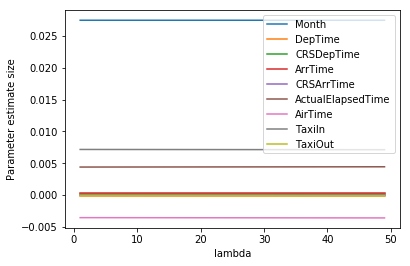

In [46]:
# Store estimates.
estimates = np.append(ridgeregr.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train, y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

## Random Forest

In [55]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

X = features_dataframe_new.drop('late',1)
Y = features_dataframe_new['late']

#X = pd.get_dummies(X)
#X = X.dropna(axis=1)

In [56]:
scores = cross_val_score(rfc, X, Y, cv=10)

print('Mean {} and Standard deviation {}'.format(np.mean(scores),np.std(scores)))

Mean 1.0 and Standard deviation 0.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.5, random_state=0)

rfc.fit(X_train, y_train)

y_true, y_pred = y_test, rfc.predict(X_test)

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

array([[ 120164,       0],
       [      0, 3606444]])